# Visión artificial aplicada a la industria
### Intecol SAS
## Clase 3:  Histograma de una Imagen - Operaciones basicas 


Un histograma es una gráfica en donde se muestra la frecuencia con las que aparecen los distintos niveles de intensidad de una imagen a escala de grises, normalmente el nivel de intensidad está en el rango de 0 a 255, en donde el valor 0 representa los color negro y 255 el color blanco.


 Es simplemente otra manera de entender la imagen. Al mirar el histograma de una imagen, se puede tener idea sobre el contraste, el brillo, la distribución de intensidad, etc. de esa imagen. Casi todas las herramientas de procesamiento de imágenes de hoy en día, proporcionan características en el histograma. 


<img src="images/histogram_sample.jpg">
 


En la figura se muestra la imagen y su histograma. (Recuerde, este histograma se dibuja para la imagen en escala de grises, no para la imagen en color). La región izquierda del histograma muestra la cantidad de píxeles más oscuros en la imagen y la región derecha muestra la cantidad de píxeles más brillantes. Del histograma puede verse que las regiones oscuras en la imagen son mayores que la regiones brillantes, pues hay más píxeles con valores cerca de 0 que píxeles cerca de su valor máximo (255). Por otra parte, la cantidad de medios tonos (valores de píxel en el rango medio, digamos alrededor de 127) son muy inferiores.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, img_as_float
from skimage import exposure
from PIL import Image, ImageOps
from numpy import *
from scipy.stats import skew

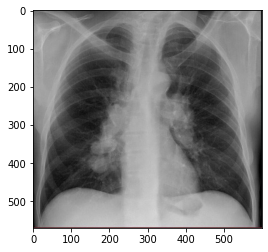

In [2]:
img = plt.imread('images/lung.jpg')
plt.imshow(img,cmap = 'gray');


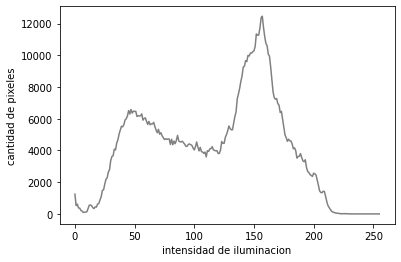

In [3]:
hist,bins = np.histogram(img.ravel(),256,[0,256])
plt.plot(hist, color='gray' )
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()

Al histograma se le pueden hallar diferentes características o propiedades estadísticas, que permiten evaluar la distribucion del holograma de forma numerica.

Entre las propiedades estadísticas de un histograma que son utiles para el procesamiento de la imagen, se encuentran:


1. media: Es el valor medio de los niveles de gris y nos informa sobre el brillo general de la imagen. Está definida por:

<img src="images/average.jpg" alt="drawing" width="200" align="center">


2. desviación estándar: Mide la dispersión a los alredores de la media. Está definida por:

<img src="images/standard.jpg" alt="drawing" width="200" align="center">

3. asimetría: La asimetría (skewness) mide el sesgo de una imagen hacia la izquierda o hacia la derecha de un punto medio. Un valor absoluto alto de $A$ indica una gran asimetría.(Z = moda )

<img src="images/asimetria.jpg" alt="drawing" width="200" align="center">




4. entropía: Aunque tiene diferentes interpretaciones, una de las mas usadas se basa en  que mide la cantidad de informacion que tiene una imagen, por ejemplo diferenciar entre  una imagen RGB de 1920x1080 otra con solamente 5 pixeles grises ,para nosotros es muy sencillo saber cual imagen contiene mas informacion visual, sin embargo para un computador no es una tarea trivial , en estos casos se usa la ecuacion de la entropia:

<img src="images/entropy.jpg" alt="drawing" width="200" align="center">

Estas propiedades también pueden ser utilizadas para modificar o alterar el comportamiento del histograma de una imagen, con el objetivo de mejorar la misma.

Mean = 117.4, standard deviation = 50.3,entropy = -11400690.6,asymetry = -0.3


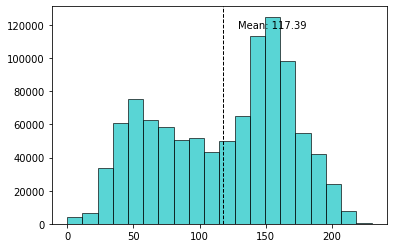

In [4]:

result = plt.hist(img.ravel(), bins=20, color='c', edgecolor='k', alpha=0.65)
plt.axvline(img.ravel().mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(img.ravel().mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(img.ravel().mean()))


print ("Mean = {:.1f}, standard deviation = {:.1f},entropy = {:.1f},asymetry = {:.1f}".format(
    np.mean(img.ravel()).item(),
    np.std(img.ravel()).item(),
     -(result[0]*np.log(np.abs(result[0]))).sum(),
    skew(img.ravel())
    
    ))

### Histograma de los 3 canales

In [5]:
# Vamos a crear una funcion

def plot_img_hist (image,title,subrows,subcols,num,size1,size2):
    fig = plt.figure(figsize=(size1,size2))
    plt.subplot(subrows,subcols,num)
    plt.imshow(image,cmap='gray');plt.title(title)
    color = ('r','g','b')
    plt.subplot(subrows,subcols,num+1)
    plt.title(" Histograma " + title)

    if len(image.shape) > 2 :            
        for i,col in enumerate(color):
            histr = cv2.calcHist([image],[i],None,[256],[0,256])
            plt.plot(histr,color = col)
            plt.xlim([0,256])
    else:
        hist,bins = np.histogram(image.ravel(),256,[0,256])
        plt.plot(hist, color='gray' )
        plt.xlim([0,256])


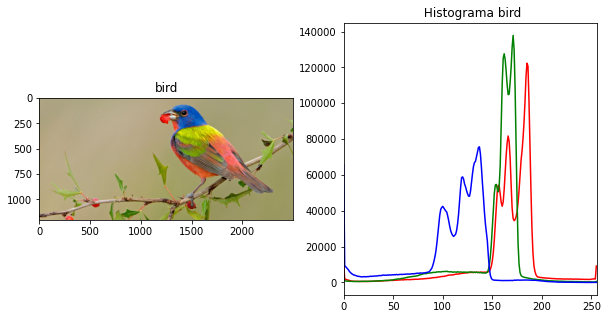

In [6]:
img = plt.imread('images/bird.jpg')
plot_img_hist(img,'bird',1,2,1,10,5)

## Operaciones elementales con pixeles

### Imagen invertida

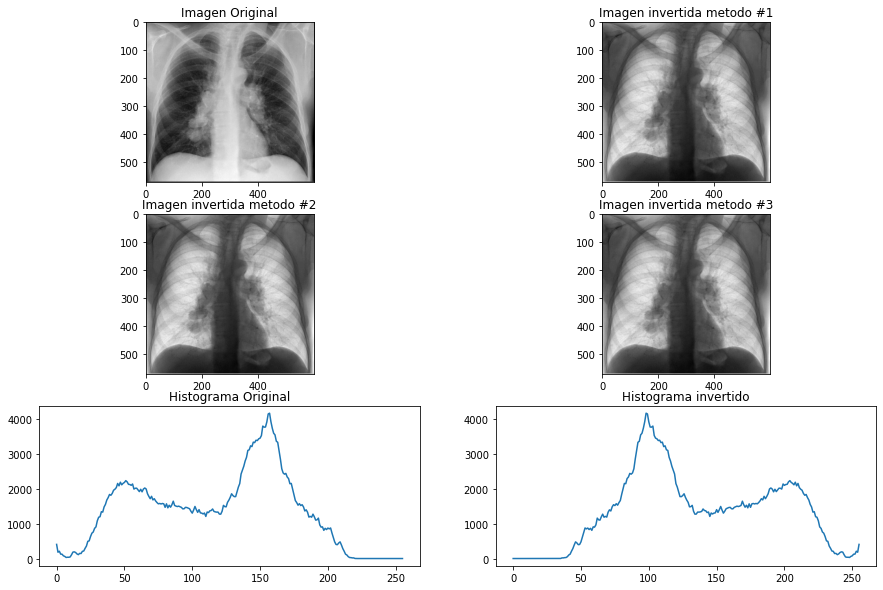

In [7]:
img1 = array(Image.open('images/lung.jpg').convert('L'))
img1_ = Image.open('images/lung.jpg')
img2 = 255 - img1 # invert image
# Hay multiples opciones para realizar las operaciones de pixeles , por ejemplo:
img3 = ~img1
img4 = ImageOps.invert(img1_)

fig = plt.figure(figsize=(15,10))

plt.subplot(3,2,1);plt.imshow(img1,cmap='gray');plt.title("Imagen Original")

plt.subplot(3,2,2);plt.imshow(img2,cmap='gray');plt.title("Imagen invertida metodo #1")
plt.subplot(3,2,3);plt.imshow(img3,cmap='gray');plt.title("Imagen invertida metodo #2")

plt.subplot(3,2,4);plt.imshow(img3,cmap='gray');plt.title("Imagen invertida metodo #3")
hist1,bins1 = np.histogram(img1.ravel(),256,[0,256])
hist2,bins2 = np.histogram(img3.ravel(),256,[0,256])
plt.subplot(3,2,5);plt.plot(hist1);plt.title("Histograma Original");
plt.subplot(3,2,6);plt.plot(hist2);plt.title("Histograma invertido");

## Transformaciones lineales
 ### Suma

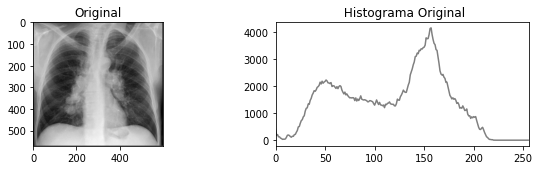

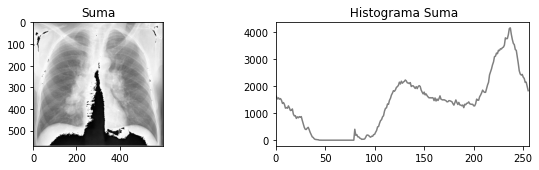

In [8]:
parametro = 80

im7 =  img1+ parametro

hist1,bins1 = np.histogram(img1.ravel(),256,[0,256])
hist2,bins2 = np.histogram(im7.ravel(),256,[0,256])

plot_img_hist(img1,'Original',2,2,1,10,5)
plot_img_hist(im7,'Suma',2,2,3,10,5)



### Multiplicacion 
La multiplicación es una operación que permite “estirar” el histograma de una imagen.

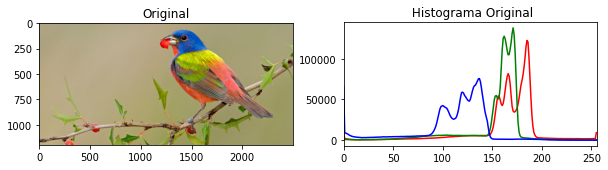

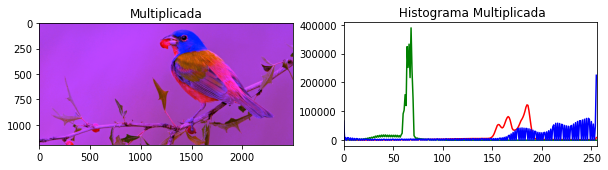

In [25]:
#Se lee la imagen
img = cv2.cvtColor(cv2.imread('images/bird.jpg'), cv2.COLOR_BGR2RGB)
#Se crea la imagen copia
img_mult = np.zeros(img.shape, np.uint8)

#Se multiplican los valores de cada canal de img por q,w,e unidades
#Se sustituyen los valores de cada canal de la copia por los valores modificados de la imagen original
r = 1
g = 0.4
b = 1.8
img_mult[:,:,0] = cv2.multiply(img[:,:,0], r)
img_mult[:,:,1] = cv2.multiply(img[:,:,1], g)
img_mult[:,:,2] = cv2.multiply(img[:,:,2], b)



plot_img_hist(img,'Original',2,2,1,10,5)
plot_img_hist(img_mult,'Multiplicada',2,2,1,10,5)


## Ejercicio:

Crear una funcion que tenga como entradas los parametros alfa , beta y una imagen,y devuelva una imagen con el  brillo y el contraste nuevo.

Nota: puede hacer operacion de cada uno de los pixeles o utilizar funciones de opencv 


In [9]:
### SOLUCION

## Transformaciones no lineales

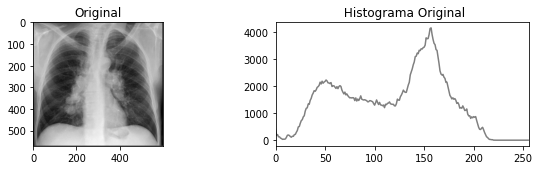

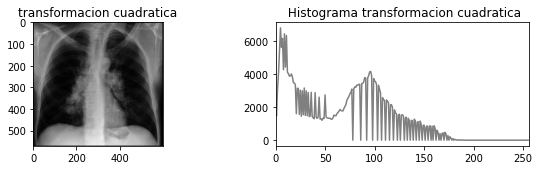

In [79]:
im6 = 255.0 * (img1/255.0)**2 # squared

plot_img_hist(img1,'Original',2,2,1,10,5)
plot_img_hist(im6,'transformacion cuadratica',2,2,1,10,5)



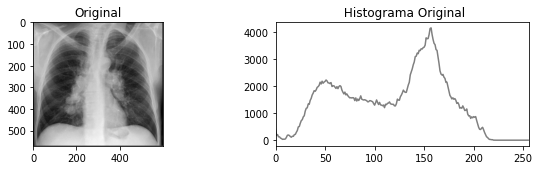

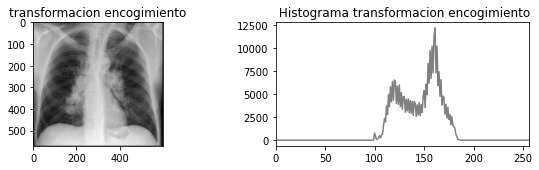

In [80]:
im5 = (100.0/255) * img1 + 100 # clamp to interval 100...200

plot_img_hist(img1,'Original',2,2,1,10,5)
plot_img_hist(im5,'transformacion encogimiento',2,2,1,10,5)


In [36]:
#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    nueva_imagen = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    nueva_imagen[:,:,0] = f(img[:,:,0], *args)
    nueva_imagen[:,:,1] = f(img[:,:,1], *args)
    nueva_imagen[:,:,2] = f(img[:,:,2], *args)
    
    return nueva_imagen

### Transformacion paranolica es utilizada para oscurecer los tonos medios y tiene la forma $ax^2+bx+c$

### Transformacion de la raiz es utilizada para aclarar los tonos medios y tiene la forma $d\sqrt{x}+e$



In [81]:
def non_linear_parabola(img, a, b, c):
    
    #Crear copia de la imagen con datos flotantes dado que se normalizarán
    img_copy = img.astype(np.float32)/255.0
    #Una parábola tiene la forma ax² + bx + c, donde x es la imagen de entrada
    #A partir de la imagen, generar ax²
    res_a = cv2.pow(img_copy,2)
    res_a = cv2.multiply(res_a,a)
    #Generar bx
    res_b = cv2.multiply(img_copy,b)
    #Sumar ax² + bx + c
    res = cv2.add(res_a, res_b)
    res = cv2.add(res, c)
    #Asegurar que los datos queden entre 0 y 255 y regresar al dato uint8
    res[res < 0 ] = 0
    res = res*255
    res[res > 255] = 255
    res = res.astype(np.uint8)
    
    return res 


def non_linear_root(img, a, b):
    
    #Crear copia de la imagen tipo flotante dada la normalización
    img_copy = img.copy().astype(np.float32)/255.0
    #La función raíz es de la forma ax⁰⁵ + b, donde x es la imagen de entrada
    res_a = cv2.pow(img_copy,0.5)
    res_a = cv2.multiply(res_a, a)
    res = cv2.add(res_a,b)
    #Asegurar que la los datos queden entre 0 y 255 y sean uint8
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255
    
    res = res.astype(np.uint8)
    
    return res

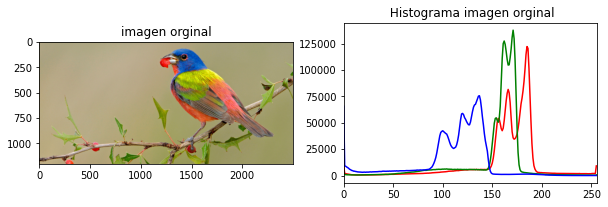

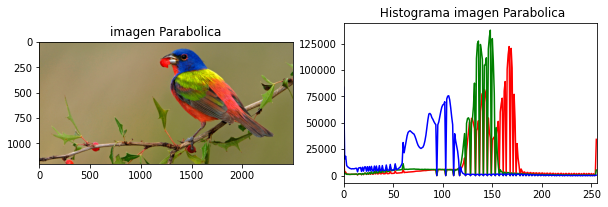

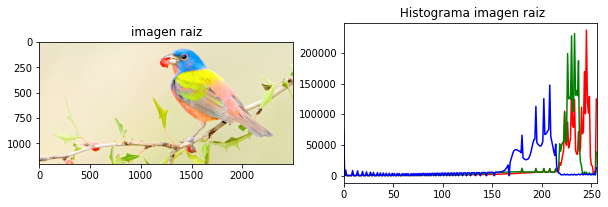

In [82]:
img = cv2.cvtColor(cv2.imread('images/bird.jpg'), cv2.COLOR_BGR2RGB)

#Dar valor a los parámetros a,b,c (args)
a = 0.7
b = 0.4
c = 0
d = 1.25
e = -0.1


#Aplicar la transformación de la parábola sobre la imagen de entrada
res_parabolica = apply_f_on_rgb(img, non_linear_parabola, [a, b, c])
#Aplicar la transformación raíz sobre la imagen de entrada 
result_root = apply_f_on_rgb(img, non_linear_root, [d, e])
plot_img_hist(img,'imagen orginal',3,2,1,10,10)
plot_img_hist(res_parabolica,'imagen Parabolica',3,2,1,10,10)
plot_img_hist(result_root,'imagen raiz',3,2,5,10,10)
# 


## Correccion Gamma


La compensación gamma surge  como una compensación de la respuesta no lineal de los monitores  de tubos de rayos catodicos.
en un dispositivo lineal  si se aplica el doble de voltaje de entrada , entonces el pixel tendria el doble de intensidad , en dichos monitores resultaba que la intensidad era una relacion exponencial de 2.2 .Dicho fenomeno es importante por que tambien ocurre en los humanos. la siguiente grafica puede explicar mejor lo que sucede:

<img src="images/gamma1.jpg" alt="drawing" >

La linea superior muestra la persepcion de los humanos y la respuesta de los monitores , mientras que la linea inferior muestra una respuesta lineal , que usualmente sucede en las fuentes fisicas de luz o en las camaras digitales 


<img src="images/gamma2.jpg" alt="drawing" >


Debido a que los humanos preferimos la escala de la fila superior , hoy en dia los monitores aun realizan la correccion gamma , es decir la correccion gamma es la que traduce  la sensibilidad de la luz de nuestro ojo y el de la camara. 


<img src="images/gamma3.jpg" alt="drawing" >

La correccion gamma viende dada por:


<img src="images/gamm4.jpg" alt="drawing" >


Donde c es una constante (usualmente 1), R es un pixel de entrada, S es un pixel de salida, y $\gamma$ es el parametro que va a modificar la distribucion de intensidad de nuestros pixeles


## Ejercicio :
realizar una funcion ```def gamma_correction(img, C, gamma):``` que reciba como parametro de entrada la constante C y la constante gamma y haga la correccion gamma a una imagen de entrada en sus tres canales(si tiene un canal igualmente debe funcionar) y utilizarlo en las imagenes   wiki y paisaje :


<img src="images/wiki.jpg" alt="drawing" >

<img src="images/paisaje.jpg" alt="drawing" width = '280'>

analizar el comportamiento y verificar cuales son los mejores parametros para cada uno de los casos

In [ ]:
##SOLUCION:




## Ecualizacion del histograma


La ecualización de histograma busca obtener una distribución uniforme de los distintos niveles de intensidad, esta técnica es muy utilizada para mejorar el contraste de las imágenes.

Para tener un buen contraste se debe cumplir:

1. la intensidad de los pixeles esta distribuida uniformemente  sobre todo el rango de valores , es decir cada valor de intensidad es igualmente probable

2. el histograma acumulativo aumenta linearmente sobre todo  el rango de intensidades

### Paso 1: Calcular el histograma acumulativo normalizado

La normalizacion se logra dividiendo la frecuencia de cada pixel por el numero total de pixeles en la imagen. como resultado el maximo valor del histograma acumulado es 1.


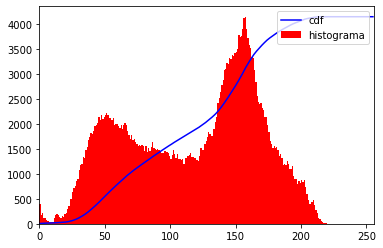

In [26]:
# STEP 1: Normalized cumulative histogram

#Genera el historama de la imagen
hist,bins = np.histogram(img1.flatten(),256,[0,256])
 
#Genera la función de distribución acumulada (cdf por sus siglas en inglés)
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

#Genera los gráficos del histograma y de la función de distribución acumulada
plt.plot(cdf_normalized, color = 'b')
plt.hist(img1.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histograma'), loc = 'upper right')
plt.show()

## Paso 2: 

Encontramos los valores máximo y mínimo de la función de distribución (excluyendo los ceros) y aplicamos la ecuación de ecualización del histograma:

<img src="images/ecualizacion.jpg">



In [31]:

nj =(cdf - cdf.min())*255
N = (cdf.max()-cdf.min())
#Aplica la transformación de ecualización
cdf_m = nj/N
 
 
#Aplica la ecualización a los píxeles de la imagen original
img2 = cdf_m[img1]


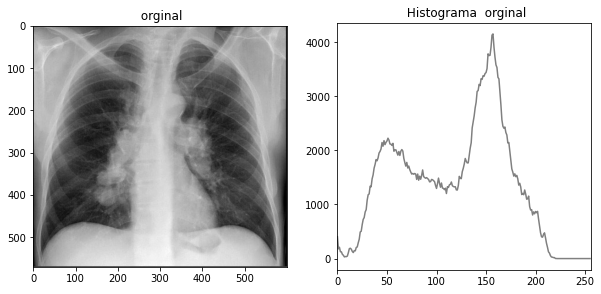

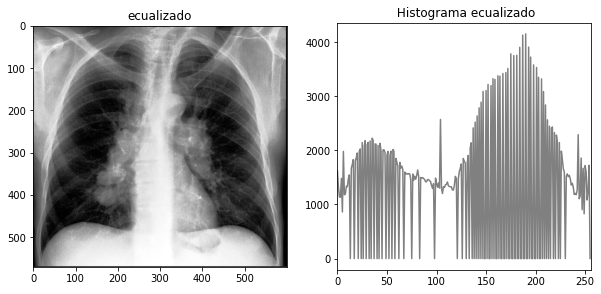

In [49]:
plot_img_hist(img1,' orginal',2,2,1,10,10)
plot_img_hist(img2,'ecualizado',2,2,3,10,10)


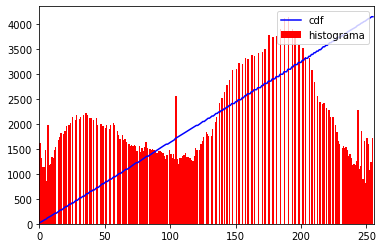

In [36]:
hist2,bins2 = np.histogram(img2.flatten(),256,[0,256])
 
#Genera la función de distribución acumulada (cdf por sus siglas en inglés)
cdf2 = hist2.cumsum()
cdf_normalized2 = cdf2 * hist2.max()/ cdf2.max()

#Genera los gráficos del histograma y de la función de distribución acumulada
plt.plot(cdf_normalized2, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histograma'), loc = 'upper right')
plt.show()

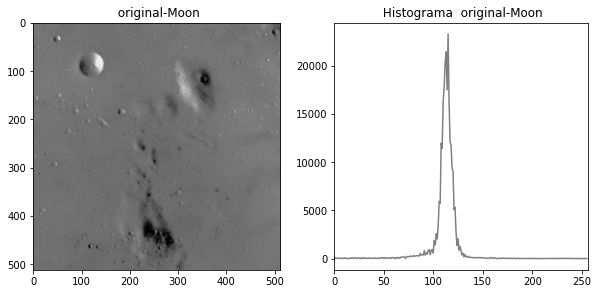

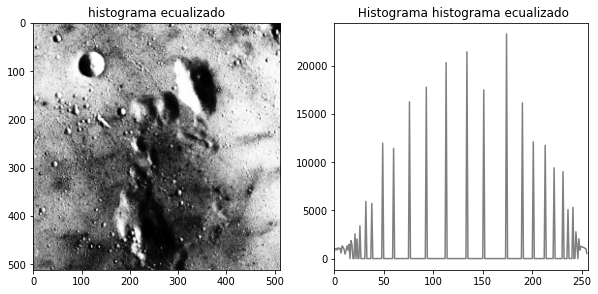

In [48]:
# img = cv2.cvtColor(cv2.imread('images/paisaje.jpg'), cv2.COLOR_BGR2GRAY)
img =data.moon()
equ = cv2.equalizeHist(img)
plot_img_hist(img,' original-Moon',2,2,1,10,10)
plot_img_hist(equ,'histograma ecualizado',2,2,3,10,10)